## Decision tree classifier/regressor

In [13]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

import sys
sys.path.append('..')

from src import trees
import importlib
importlib.reload(trees);


#### Decision tree classifier example with Iris dataset

In [7]:
# Example with Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data shapes - X_train: {X_train.shape}, X_test: {X_test.shape},  y_train: {y_train.shape},  y_test: {y_test.shape}\n")

# Create and train the classifier
clf = trees.DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the tree structure
print("\nTree Structure:\n")
clf.print_tree()



Data shapes - X_train: (120, 4), X_test: (30, 4),  y_train: (120,),  y_test: (30,)

Accuracy: 1.00

Tree Structure:

If Feature[2] <= 1.95:
  Leaf: 0
Else:
  If Feature[2] <= 4.75:
    If Feature[3] <= 1.65:
      Leaf: 1
    Else:
      Leaf: 2
  Else:
    If Feature[3] <= 1.75:
      Leaf: 1
    Else:
      Leaf: 2


#### Decision tree classifier example with Wine dataset

In [8]:
# Example with Wine dataset
wine = load_wine()
X = wine.data
y = wine.target
names = wine.feature_names


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data shapes - X_train: {X_train.shape}, X_test: {X_test.shape},  y_train: {y_train.shape},  y_test: {y_test.shape}\n")

# Create and train the classifier
clf = trees.DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the tree structure
print("\nTree Structure:\n")
clf.print_tree(feature_names=names)



Data shapes - X_train: (142, 13), X_test: (36, 13),  y_train: (142,),  y_test: (36,)

Accuracy: 0.94

Tree Structure:

If color_intensity <= 3.81:
  If proline <= 1002.50:
    If ash <= 2.93:
      Leaf: 1
    Else:
      Leaf: 0
  Else:
    Leaf: 0
Else:
  If flavanoids <= 1.40:
    Leaf: 2
  Else:
    If proline <= 724.50:
      If alcohol <= 13.14:
        Leaf: 1
      Else:
        Leaf: 0
    Else:
      Leaf: 0


#### DecisionTreeRegressor with California housing dataset

Data shapes - X_train: (16512, 8), X_test: (4128, 8), y_train: (16512,), y_test: (4128,)

R² Score: 0.65

Tree Structure:

If MedInc <= 5.12:
  If MedInc <= 3.10:
    If AveRooms <= 4.31:
      If MedInc <= 2.20:
        If AveRooms <= 3.40:
          If Latitude <= 34.04:
            If Longitude <= -117.16:
              Leaf: 1.54
            Else:
              Leaf: 1.07
          Else:
            If Latitude <= 37.88:
              Leaf: 2.08
            Else:
              Leaf: 1.08
        Else:
          If AveOccup <= 2.16:
            If Longitude <= -121.89:
              Leaf: 2.02
            Else:
              Leaf: 1.40
          Else:
            If Latitude <= 34.42:
              Leaf: 1.25
            Else:
              Leaf: 0.90
      Else:
        If AveOccup <= 2.56:
          If Longitude <= -118.27:
            If Latitude <= 37.82:
              Leaf: 2.74
            Else:
              Leaf: 1.69
          Else:
            If Longitude <= -117.15:
    

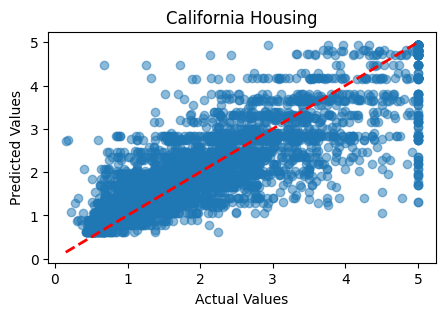

In [30]:
# Example with California Housing dataset
california = fetch_california_housing()
X = california.data
y = california.target
feature_names = california.feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data shapes - X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}\n")

# Create and train the regressor
reg = trees.DecisionTreeRegressor(max_depth=7)
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

# Print the tree structure
print("\nTree Structure:\n")
reg.print_tree(feature_names=feature_names)

# Visualize predictions vs actual values
plt.figure(figsize=(5,3))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('California Housing')
plt.show()